# Intro a Spatial Data Science con R

Hay una gran cantidad de paquetes de R útiles para trabajar con datos espaciales. Para los ejemplos de este documento se requiere tener instalados los siguientes: 

In [ ]:
install.packages(c("rgdal", "raster", "mapview", "ggplot2", "rgl", "spdep", "caret", "tmap", "geospt" "twitteR", "MODISTools"))

Este documento fue generado con [RStudio IDE](https://www.rstudio.com/products/rstudio/download/) versión 0.99.1246, actualmente en Preview.

En R podemos importar archivos vector con el paquete **[rgdal](https://cran.r-project.org/web/packages/rgdal/index.html)** como objetos de clase Spatial___DataFrame:

In [2]:
library(rgdal)
myShp <- readOGR("data/llanos.shp", layer = "llanos")
summary(myShp)

# Ejemplo KML
# myKML <- readOGR("data/llanos_kml.kml", layer = "llanos_kml")

OGR data source with driver: ESRI Shapefile 
Source: "data/llanos.shp", layer: "llanos"
with 1 features
It has 5 fields


Object of class SpatialPolygonsDataFrame
Coordinates:
         min        max
x -73.890084 -67.409803
y   2.581074   7.104381
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0]
Data attributes:
      cat        Country   ecoregion      AREA             PERIMETER      
 Min.   :3   Colombia:1   Llanos:1   Min.   :1.533e+11   Min.   :2792892  
 1st Qu.:3                           1st Qu.:1.533e+11   1st Qu.:2792892  
 Median :3                           Median :1.533e+11   Median :2792892  
 Mean   :3                           Mean   :1.533e+11   Mean   :2792892  
 3rd Qu.:3                           3rd Qu.:1.533e+11   3rd Qu.:2792892  
 Max.   :3                           Max.   :1.533e+11   Max.   :2792892  

Shapefiles también pueden ser importados con el comando `shapefile` del paquete **[raster](https://cran.r-project.org/web/packages/raster/index.html)** de manera más simple:

class       : SpatialPolygonsDataFrame 
features    : 1 
extent      : -73.89008, -67.4098, 2.581074, 7.104381  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
variables   : 5
names       : cat,  Country, ecoregion,         AREA, PERIMETER 
min values  :   3, Colombia,    Llanos, 153281453591,   2792892 
max values  :   3, Colombia,    Llanos, 153281453591,   2792892 

Warning message:
In lapply(xd, as.numeric): NAs introduced by coercionWarning message:
In lapply(xd, as.numeric): NAs introduced by coercion

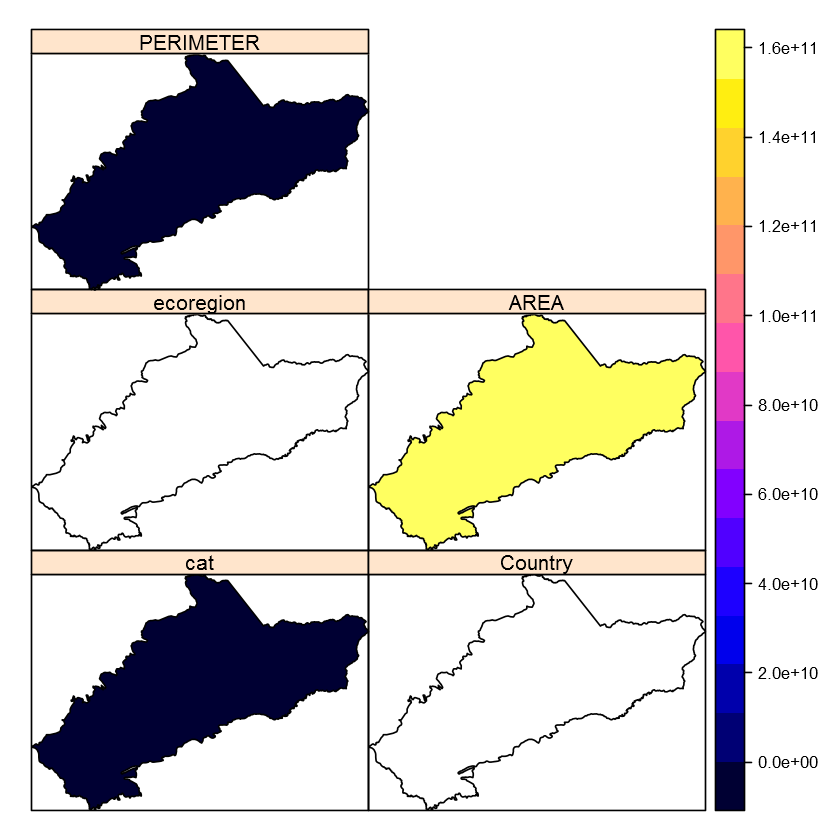

In [3]:
library(raster)
shp <- shapefile("data/llanos.shp")
shp
spplot(shp)

Podemos generar mapas web para visualizar información geográfica usando paquetes como **[leaflet](https://cran.r-project.org/web/packages/leaflet/index.html)** o **[mapview](https://cran.r-project.org/web/packages/mapview/index.html)**. Con  **[mapview](https://cran.r-project.org/web/packages/mapview/index.html)** solo necesitamos una línea de código para crear un mapa web con los elementos básicos:

In [14]:
library(mapview)
mapView(shp)

Warning message:
In leafletPolygonsDF(x, map = map, map.types = map.types, zcol = zcol, : Feature labels on mouseover are not supported in the installed version of 'leaflet'. 
Run devtools::install_github('rstudio/leaflet') to fix this issue.

class       : RasterLayer 
dimensions  : 6949, 7215, 50137035  (nrow, ncol, ncell)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -73.89029, -71.94589, 3.403178, 5.275895  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:\Users\Public\Documents\amsantac\other\webinar\data\cropimg.tif 
names       : cropimg 
values      : 0, 8  (min, max)


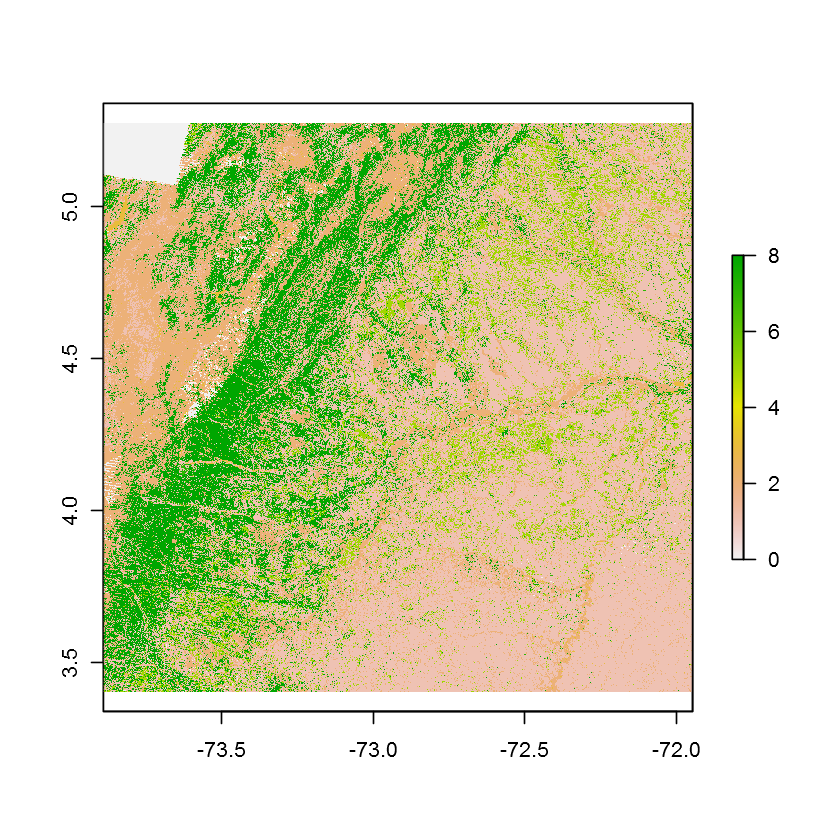

In [5]:
miTIFF <- raster("data/cropimg.tif")
miTIFF
plot(miTIFF)

Loading required namespace: rgeos


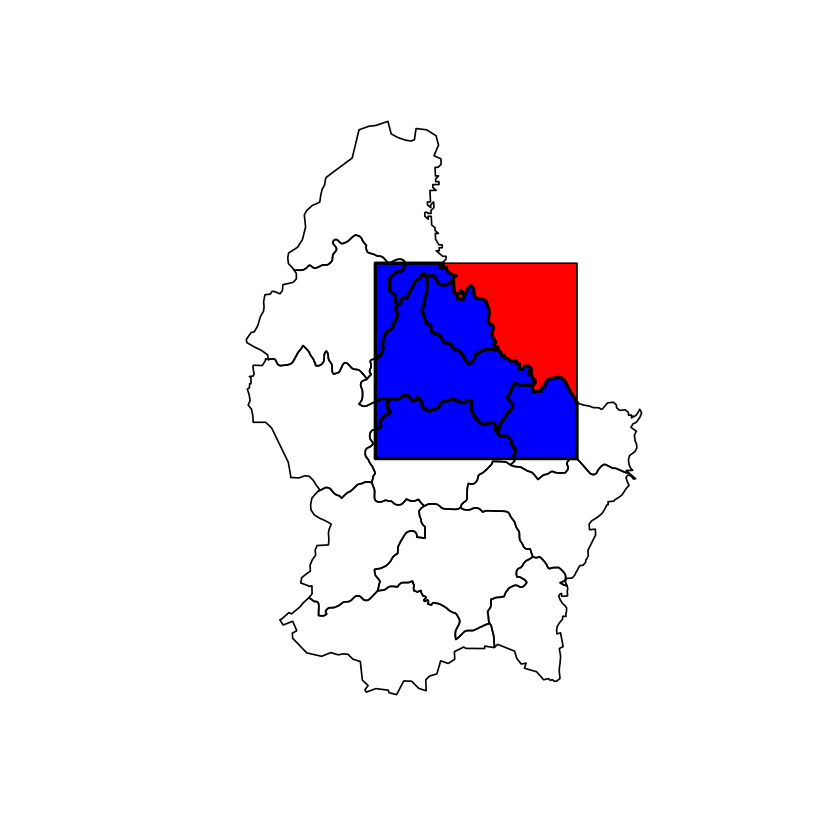

In [6]:
p <- shapefile(system.file("external/lux.shp", package="raster"))
b <- as(extent(6, 6.4, 49.75, 50), 'SpatialPolygons')
projection(b) <- projection(p)
i <- intersect(p, b)
plot(p)
plot(b, add=TRUE, col='red')
plot(i, add=TRUE, col='blue', lwd=2)

In [8]:
vis <- shapefile("data/ba_LC80940792015255LGN00_sr.shp")@data
summary(vis[, 13:20])

      red              nir             swir1            swir2       
 Min.   :0.0889   Min.   :0.1693   Min.   :0.2504   Min.   :0.1931  
 1st Qu.:0.1580   1st Qu.:0.2298   1st Qu.:0.3598   1st Qu.:0.2923  
 Median :0.1756   Median :0.2510   Median :0.3831   Median :0.3179  
 Mean   :0.1794   Mean   :0.2545   Mean   :0.3853   Mean   :0.3217  
 3rd Qu.:0.1983   3rd Qu.:0.2768   3rd Qu.:0.4157   3rd Qu.:0.3495  
 Max.   :0.2956   Max.   :0.3764   Max.   :0.5063   Max.   :0.4425  
      dvi               evi               gdvi             ndvi       
 Min.   :0.03440   Min.   :0.04770   Min.   :0.0937   Min.   :0.0837  
 1st Qu.:0.06557   1st Qu.:0.08317   1st Qu.:0.1406   1st Qu.:0.1428  
 Median :0.07760   Median :0.10071   Median :0.1582   Median :0.1794  
 Mean   :0.07507   Mean   :0.09942   Mean   :0.1558   Mean   :0.1763  
 3rd Qu.:0.08485   3rd Qu.:0.11388   3rd Qu.:0.1717   3rd Qu.:0.2035  
 Max.   :0.11980   Max.   :0.16793   Max.   :0.2114   Max.   :0.3415  

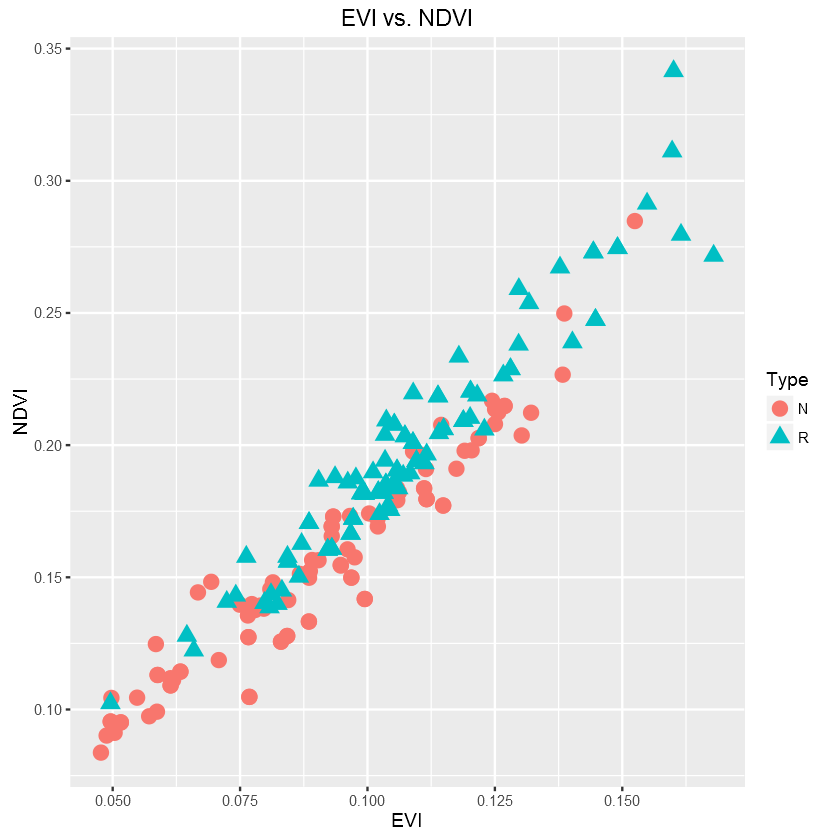

In [9]:
library(ggplot2)
p <- qplot(vis$evi, vis$ndvi, color = vis$Landtype, shape = vis$Landtype, 
             main = "EVI vs. NDVI", xlab = "EVI", ylab = "NDVI") + geom_point(size = 4) +
    guides(colour = guide_legend("Type"), shape = guide_legend("Type"))
p

Warning message:
: package 'tmap' was built under R version 3.3.1

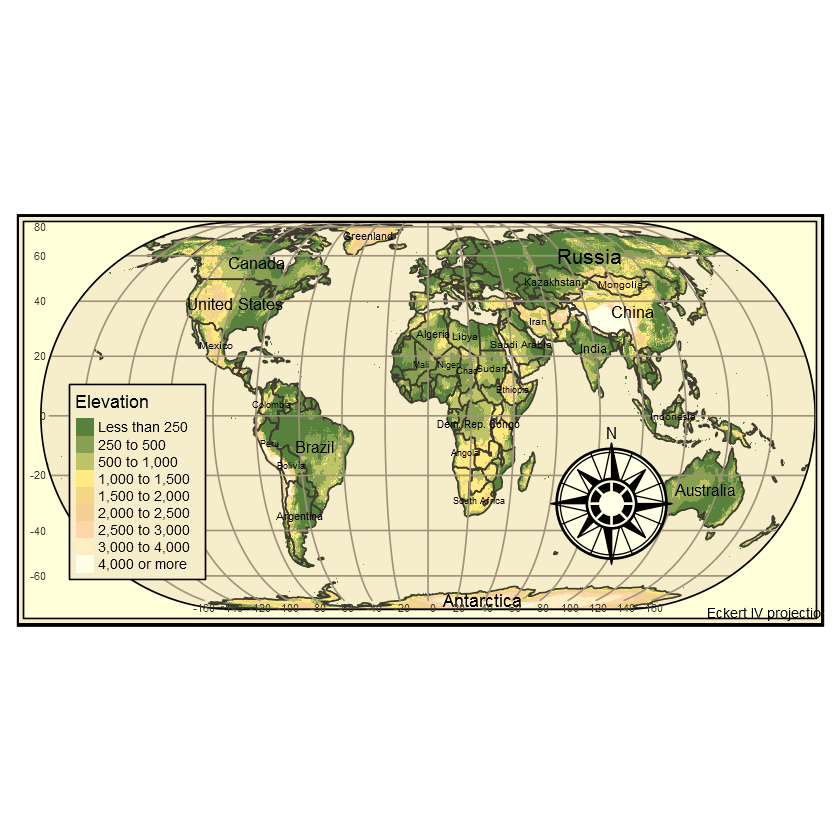

In [10]:
library(tmap)
data(land, World)
tm_shape(land, projection="eck4") +
    tm_raster("elevation", breaks=c(-Inf, 250, 500, 1000, 1500, 2000, 2500, 3000, 4000, Inf),
        palette = terrain.colors(9), title="Elevation", auto.palette.mapping=FALSE) +
tm_shape(World) +
    tm_borders("grey20") +
    tm_grid(projection="longlat", labels.size = .5) +
    tm_text("name", size="AREA") +
tm_compass(position = c(.65, .15), color.light = "grey90") +
tm_credits("Eckert IV projection", position = c(.85, 0)) +
tm_style_classic(inner.margins=c(.04,.03, .02, .01), legend.position = c("left", "bottom"),
    legend.frame = TRUE, bg.color="lightblue", legend.bg.color="lightblue",
    earth.boundary = TRUE, space.color="grey90")

## Ahora hagamos procesamiento con ArcPy

Aplicar un filtro espacial (por ejemplo, majority) **es mucho más rápido** con ArcGIS que con R. Veamos cómo aplicar un filtro a un archivo raster con ArcPy: 

In [ ]:
# Import arcpy and define the workspace
import arcpy
arcpy.env.workspace="C:/Users/Public/Documents/amsantac/data"
from arcpy.sa import *

In [ ]:
# List the raster files in the workspace 
rasters = arcpy.ListRasters("*", "ALL")
for raster in rasters:
    print(raster)

### **Descarga los materiales de este documento**

El código fuente de este documento escrito en RMarkdown se puede descargar desde [https://github.com/amsantac/extras](https://github.com/amsantac/extras) (usar el boton 'Clone or Download') en la carpeta '2016-07-13-spatial-data-science-r-webinar'. El video del webinar asociado con esta presentacion se puede ver [en este link](https://youtu.be/EbbSY6EJ4js).

**[Volver al blog](http://amsantac.co/blog/es/2016/08/07/spatial-data-science-r-es.html)**